# Music Recommendation System using Python

Movie recommendation systems often employ a combination of collaborative filtering and content-based methods (hybrid approaches) to provide more robust and personalized suggestions to users. The specific implementation can vary based on the goals and design choices of the recommendation system.  hybrid recommendation system

## Recommendation System using Spotify API

The Spotify API, developed by Spotify, comprises a set of guidelines and protocols. It provides developers with the ability to engage with Spotify's extensive music catalog and retrieve various music-related data. This includes details about tracks, albums, artists, playlists, user profiles, and play history, among other features. Utilizing the Spotify API, developers can create inventive applications and services that seamlessly integrate with the Spotify platform.

For the construction of a Music Recommendation System using the Spotify API, the initial step involves obtaining real-time music data directly from Spotify. This necessitates the possession of a Spotify developer account, through which the necessary credentials can be acquired to access Spotify's data.

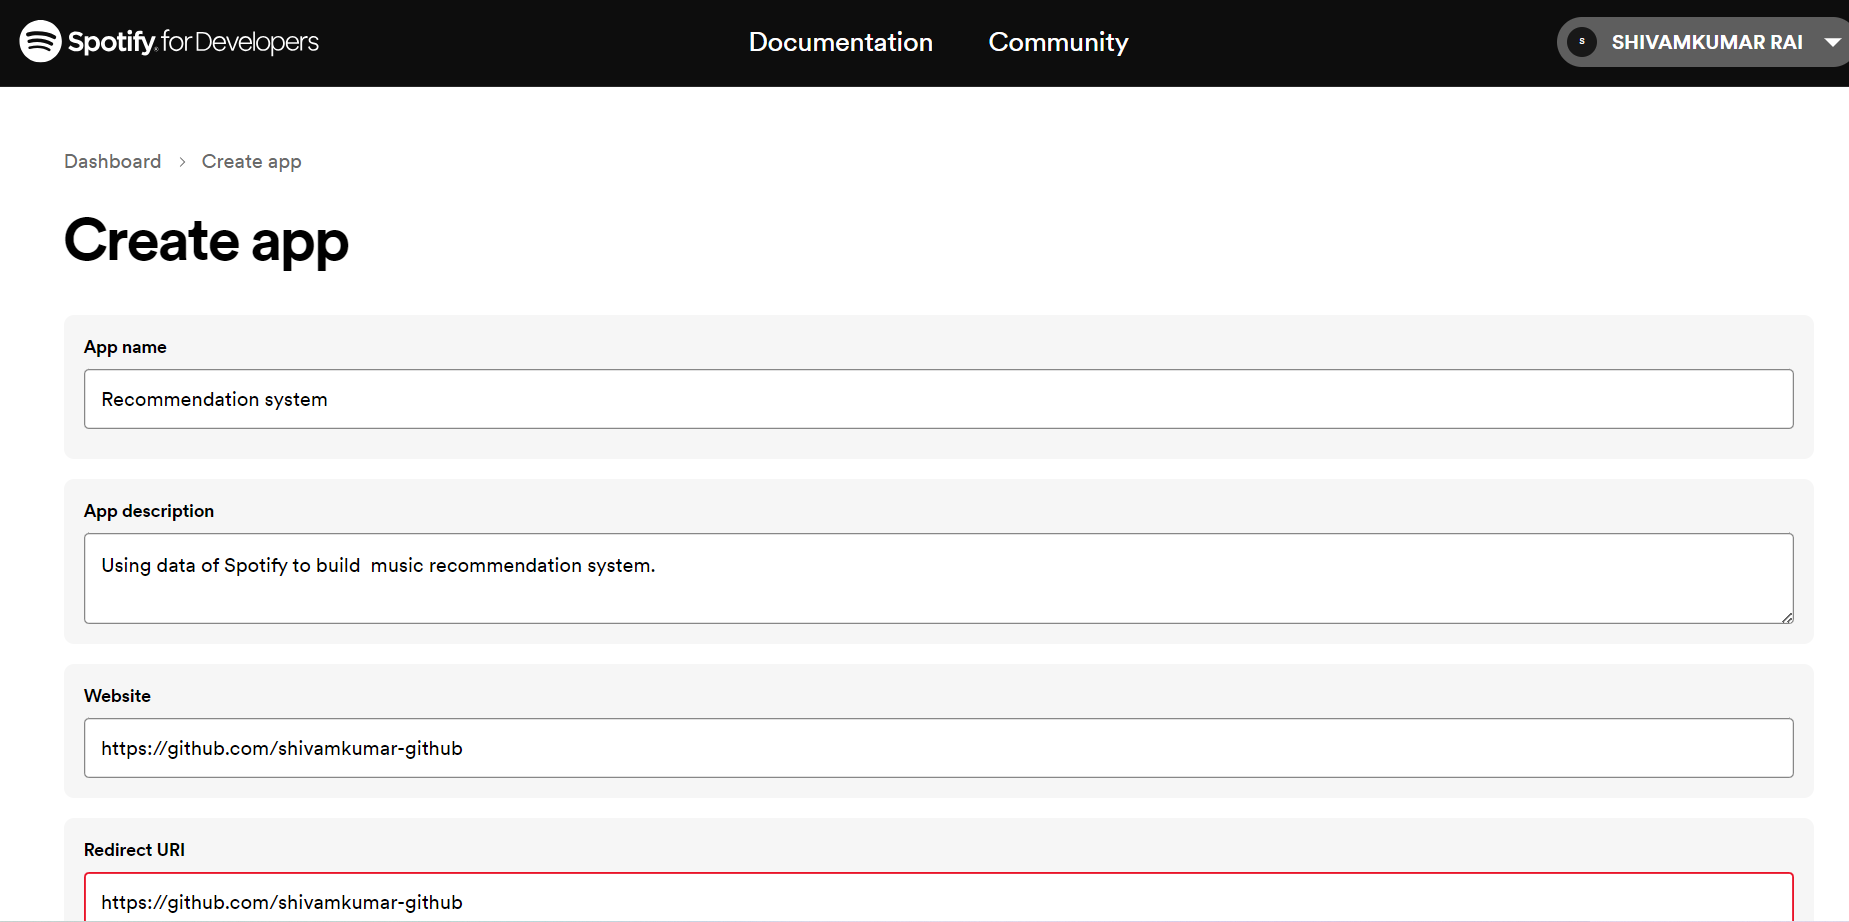

Initiating the development of a Music Recommendation System begins with obtaining an access token. This token functions as a transient authorization credential, enabling the code to execute authenticated requests to the Spotify API on behalf of the application. The following outlines the steps to acquire this access token:

In [18]:
import requests
import base64

In [19]:
#Client ID and Client Secret
CLIENT_ID = '7555d6f6b1a14ec5b90857bb44ab80f6'
CLIENT_SECRET = '8877a8600fe5421692ea4916ce64ca6e'

After executing these lines, client_credentials_base64 holds the Base64-encoded version of the client ID and client secret, which is commonly used in authentication processes when interacting with APIs like the Spotify API. This encoded string is often included in the headers of HTTP requests as an authorization token when making requests to the API on behalf of the client application.

In [20]:
# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())


In the given code, CLIENT_ID and CLIENT_SECRET store your unique credentials identifying your application with the Spotify API. These credentials are acquired when registering your app on Spotify’s developer dashboard. The Client ID is like a username for the app, and the Client Secret is a secret key for security.

The code combines the client ID and secret with a colon, then encodes the result using Base64 for security. This encoded string is sent to Spotify's API to get an access token, serving as a temporary permission slip for the app.

The access token allows the app to make authorized requests to Spotify, like fetching music data (tracks, albums, artists, etc.). This is crucial for constructing a Music Recommendation System using the Spotify API and Python.

In [21]:
# Requesting the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


To retrieve music data from any Spotify playlist, the Spotipy library needs to be installed. You can do this by executing the following command in your command prompt or terminal:

In [22]:
pip install spotipy

Once Spotipy is installed, you can use it to build a function that fetches music data from any Spotify playlist. Here's an example function:

In [23]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [24]:
def get_trending_playlist_data(playlist_id, access_token):
    # Seting up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)
    # Geting the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')
    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']
        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

The function starts by setting up Spotipy with the provided access token, which is like a permission slip to use Spotify's Web API. This token lets the function ask Spotify for information. Using Spotipy, it fetches details about the tracks in a specified playlist (identified by playlist_id). The function specifically asks for information like track names, artists, album names, and other details.



For each track in the playlist, the function gathers information like track name, artist, album name, and more. It also fetches audio features like danceability and tempo using sp.audio_features. All this data is then organized into a list of dictionaries called music_data.


This list is then transformed into a DataFrame, a kind of table that makes it easy to analyze and work with the collected information. The DataFrame is like a structured way to look at all the details about the tracks in the playlist.

 Here’s how we can use the function to collect music data from any playlist on Spotify:

In [25]:
playlist_id = '3cEYpjA9oz9GiPac4AsH4n'

# Call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)

# Display the DataFrame
print(music_df)

             Track Name              Artists  \
0                   Api               Odiseo   
1                    Is         Vlasta Marek   
2            All I Want      LCD Soundsystem   
3             Endpoints  Glenn Horiuchi Trio   
4  You Are So Beautiful             Zucchero   

                                          Album Name                Album ID  \
0                 Progressive Psy Trance Picks Vol.8  2pANdqPvxInB0YvcDiw4ko   
1                         Wellness & Dreaming Source  6nlfkk5GoXRL1nktlATNsy   
2                                  This Is Happening  4hnqM0JK4CM1phwfq1Ldyz   
3  Glenn Horiuchi Trio / Gelenn Horiuchi Quartet:...  2usKFntxa98WHMcyW6xJBz   
4                     All The Best (Spanish Version)  0ivM6kSawaug0j3tZVusG2   

                 Track ID  Popularity Release Date  Duration (ms)  Explicit  \
0  4rzfv0JLZfVhOhbSQ8o5jZ           2   2012-04-02         376000     False   
1  5o3jMYOSbaVz3tkgwhELSV           0   2015-01-09         730067     Fa

Checking null values

In [26]:
print(music_df.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

data = music_df

To improve music recommendations by prioritizing the latest releases, we'll create a function. This function will give more importance to recent releases in the recommendations.

In [31]:
# Function to calculate weighted popularity scores based on release date
def calculate_weighted_popularity(release_date):
    # Convert the release date to datetime object
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    # Calculate the time span between release date and today's date
    time_span = datetime.now() - release_date

    # Calculate the weighted popularity score based on time span (e.g., more recent releases have higher weight)
    weight = 1 / (time_span.days + 1)
    return weight

This function deals with music track release dates in the format 'YYYY-MM-DD'. It converts the release date into a datetime object using Python's datetime module. The time span between the release date and the current date is calculated using datetime.now() - release_date. This gives a timedelta object representing the time difference.



The function computes a weighted popularity score based on this time span using the formula 1 / (time_span.days + 1). The days attribute of the timedelta object indicates the number of days between the release date and today. Adding 1 ensures the weight is never zero, preventing division by zero errors. The idea is to assign higher weights to more recent releases, making them more influential in the overall recommendation system compared to older tracks.

Normalizing the music features

In [32]:
# Normalize the music features using Min-Max scaling
scaler = MinMaxScaler()
music_features = music_df[['Danceability', 'Energy', 'Key',
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

To craft a hybrid recommendation system for music, we'll employ two approaches. The first approach focuses on recommending music based on audio features, while the second centers around weighted popularity for recommendations. This combination aims to provide diverse and personalized music suggestions, considering both the inherent characteristics of the tracks and their temporal relevance.


To suggest music based on audio features, follow these steps.

In [33]:
# a function to get content-based recommendations based on music features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = music_df[music_df['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = music_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return content_based_recommendations

This function takes the input song name and checks if it exists in the music dataset. If found, it calculates similarity scores between the input song's audio features and all other songs using cosine similarity. The top similar songs are identified, excluding the input song. Details of the recommended songs are then extracted from the dataset.



Now, here's the function for generating music recommendations. It combines recommendations based on weighted popularity with those from content-based filtering using a hybrid approach.

In [34]:
# a function to get hybrid recommendations based on weighted popularity
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get content-based recommendations
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Get the popularity score of the input song
    popularity_score = music_df.loc[music_df['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Combine content-based and popularity-based recommendations based on weighted popularity
    hybrid_recommendations = content_based_rec
    hybrid_recommendations = hybrid_recommendations.append({
        'Track Name': input_song_name,
        'Artists': music_df.loc[music_df['Track Name'] == input_song_name, 'Artists'].values[0],
        'Album Name': music_df.loc[music_df['Track Name'] == input_song_name, 'Album Name'].values[0],
        'Release Date': music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0],
        'Popularity': weighted_popularity_score
    }, ignore_index=True)

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]


    return hybrid_recommendations

The hybrid approach combines content similarity and weighted popularity for personalized recommendations. The function takes an input song name and uses the content_based_recommendations function to get content-based suggestions. The popularity score of the input song is calculated from the music dataset, and a weighted popularity score is determined based on the release date using calculate_weighted_popularity.

Content-based recommendations are stored in content_based_rec, and a DataFrame named hybrid_recommendations is created by combining these recommendations with the input song's details and its weighted popularity score. This DataFrame is then sorted based on weighted popularity in descending order.

The final step removes the input song from the recommendations to avoid redundancy. This function provides a way to test and generate music recommendations using both content-based and popularity-based factors.

In [36]:
input_song_name = "You Are So Beautiful"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)
print(f"Hybrid recommended songs for '{input_song_name}':")
print(recommendations)

Hybrid recommended songs for 'You Are So Beautiful':
   Track Name              Artists  \
1  All I Want      LCD Soundsystem   
0         Api               Odiseo   
2          Is         Vlasta Marek   
3   Endpoints  Glenn Horiuchi Trio   

                                          Album Name Release Date  Popularity  
1                                  This Is Happening   2010-05-17        44.0  
0                 Progressive Psy Trance Picks Vol.8   2012-04-02         2.0  
2                         Wellness & Dreaming Source   2015-01-09         0.0  
3  Glenn Horiuchi Trio / Gelenn Horiuchi Quartet:...   2011-04-01         0.0  


<ipython-input-34-3de633f34e34>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hybrid_recommendations = hybrid_recommendations.append({
